In [1]:
# Import dependencies
import pandas as pd
import sqlite3
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:

# Connect to the SQLite database
conn = sqlite3.connect("../Resources/fetal_health_CTG_data.db")

# Query to select all data from the table
query = "SELECT * FROM fetal_health_CTG_data"

# Read data from the database into a DataFrame
fetal_df= pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [3]:
# Display the DataFrame
fetal_df.head()

,baseline_FHR_bpm,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnorm_ST_Var_Perc,mean_ST_Var,abnorm_LT_Var_Perc,...,FHR_hist_min,FHR_hist_max,FHR_hist_num_peaks,FHR_hist_num_zeroes,FHR_hist_mode,FHR_hist_mean,FHR_hist_median,FHR_hist_variance,FHR_hist_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


In [4]:
#check the value counts of fetal health
health_status_ct=fetal_df["fetal_health"].value_counts()
health_status_ct

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

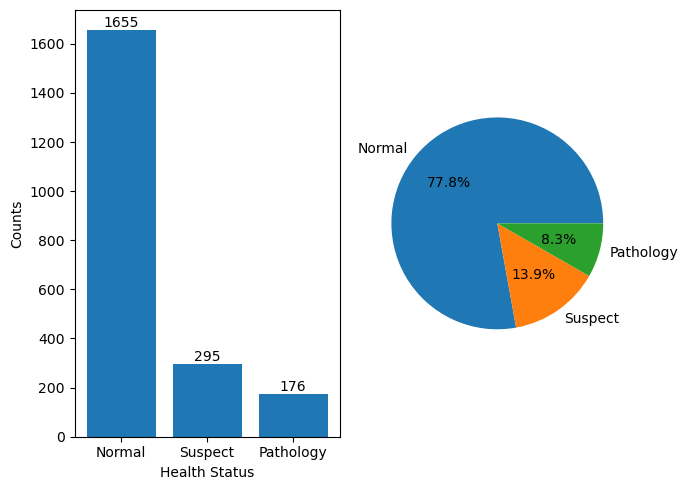

In [5]:
# Create subplots
labels = ["Normal", "Suspect", "Pathology"]
plt.figure(figsize=(7, 5))
#colors = {"Normal": "green", "Suspect": "orange", "Pathology": "red"}
# Subplot for bar chart
plt.subplot(1, 2, 1)
#plt.bar(labels, health_status_ct, color=[colors[label] for label in labels])
plt.bar(labels, health_status_ct)
plt.xlabel("Health Status")
plt.ylabel("Counts")
#plt.title("Distribution of Fetal Health Status")

# Add count labels on top of each bar
for i, count in enumerate(health_status_ct):
    plt.text(i, count, str(count), ha="center", va="bottom")

# Subplot for pie chart
plt.subplot(1, 2, 2)
#plt.pie(health_status_ct, labels=labels, autopct="%1.1f%%", startangle=140,colors=[colors[label] for label in labels])
plt.pie(health_status_ct, labels=labels, autopct="%1.1f%%")
#plt.title("Distribution of Fetal Health Status ")

# Adjust layout
plt.tight_layout()

plt.savefig("../Images/fetal_health_status_count")
# Show plots
plt.show()


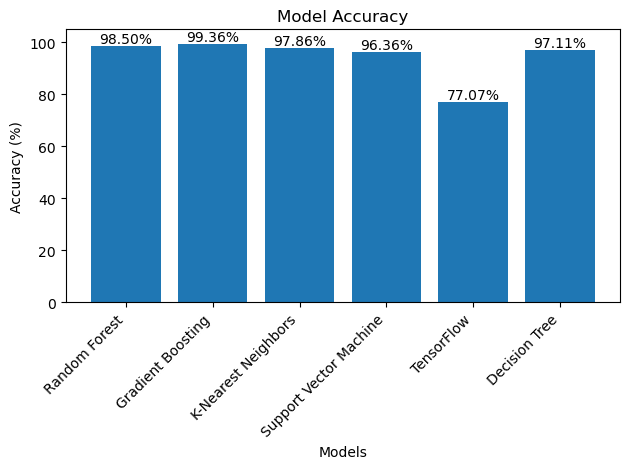

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Support Vector Machine", "TensorFlow", "Decision Tree"]
accuracy = [0.985011, 0.993576, 0.978587, 0.963597, 0.770677, 0.971092]

# Convert accuracy values to percentages
accuracy_percentage = [acc * 100 for acc in accuracy]

# Plotting the bar chart
#plt.figure(figsize=(5,5))
bars = plt.bar(np.arange(len(models)), accuracy_percentage)

# Adding accuracy values at the top of each bar
for i, acc in enumerate(accuracy_percentage):
    plt.text(i, acc, f"{acc:.2f}%", ha='center', va='bottom')

# Adding title and labels
plt.title("Model Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

# Customize y-axis to show percentages from 0 to 100
plt.ylim(0,105,2)

# Customize x-axis ticks and labels
plt.xticks(np.arange(len(models)), models, rotation=45, ha='right')

# Display the plot
plt.tight_layout()







plt.savefig("../Images/scores")
plt.show()


In [7]:
fetal_df.corr()

,baseline_FHR_bpm,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnorm_ST_Var_Perc,mean_ST_Var,abnorm_LT_Var_Perc,...,FHR_hist_min,FHR_hist_max,FHR_hist_num_peaks,FHR_hist_num_zeroes,FHR_hist_mode,FHR_hist_mean,FHR_hist_median,FHR_hist_variance,FHR_hist_tendency,fetal_health
baseline_FHR_bpm,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolonged_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnorm_ST_Var_Perc,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_ST_Var,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
abnorm_LT_Var_Perc,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [8]:
# Calculate the correlation matrix
correlation_matrix = fetal_df.corr()

# Extract the correlation coefficients of features with the target variable
correlation_with_target = correlation_matrix["fetal_health"].sort_values(ascending=False)

# Print the correlation coefficients
print(correlation_with_target)

fetal_health               1.000000
prolonged_decelerations    0.484859
abnorm_ST_Var_Perc         0.471191
abnorm_LT_Var_Perc         0.426146
FHR_hist_variance          0.206630
baseline_FHR_bpm           0.148151
severe_decelerations       0.131934
fetal_movement             0.088010
FHR_hist_min               0.063175
light_decelerations        0.058870
FHR_hist_num_zeroes       -0.016682
FHR_hist_num_peaks        -0.023666
FHR_hist_max              -0.045265
FHR_hist_width            -0.068789
mean_ST_Var               -0.103382
FHR_hist_tendency         -0.131976
uterine_contractions      -0.204894
FHR_hist_median           -0.205033
mean_LT_Var               -0.226797
FHR_hist_mean             -0.226985
FHR_hist_mode             -0.250412
accelerations             -0.364066
Name: fetal_health, dtype: float64


In [9]:
# Define threshold for correlation coefficients
threshold = 0.3

# Create a list of tuples containing variable names and their correlations with the target variable,
# filtering out variables with correlations below the threshold
variables_with_correlation = [(variable, correlation) for variable, correlation in correlation_with_target.items()
                               if abs(correlation) >= threshold]

# Print the list of variables with their correlations
for variable, correlation in variables_with_correlation:
    print(f'{variable}: {correlation}')

fetal_health: 1.0
prolonged_decelerations: 0.48485918632134756
abnorm_ST_Var_Perc: 0.4711907528466762
abnorm_LT_Var_Perc: 0.42614641992406366
accelerations: -0.36406579288786295


The feature showing the relatively strong correlation with fetal health is prolonged decelerations. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability.

correlation coefficient : 0.48
The r squared value is :0.24


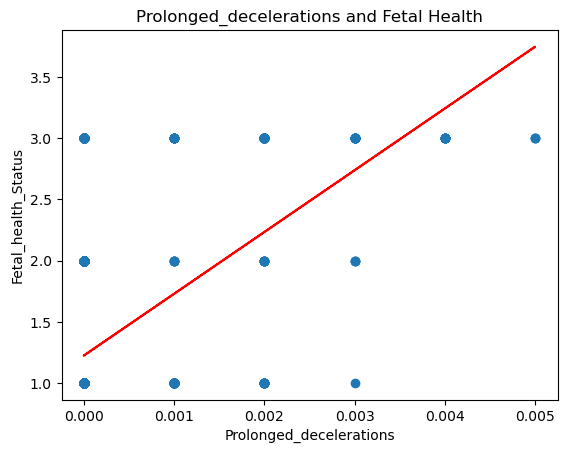

In [10]:
#Scatter plot
from scipy.stats import linregress

x_values = fetal_df ["prolonged_decelerations"]
y_values=fetal_df["fetal_health"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2.2),fontsize=15,color="red")
plt.xlabel("Prolonged_decelerations")
plt.ylabel("Fetal_health_Status")
plt.title("Prolonged_decelerations and Fetal Health")
print(f"correlation coefficient : {round(rvalue,2)}")
print(f"The r squared value is :{round(rvalue**2,2)}")

plt.show()

This lineplot clearly shows the relationship between prolonged decelerations of fetal heart rate and fetal health outcome. The longer amount of time observed with prolonged decelerations, the more at-risk the health outcome was likely to be.

In [11]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame df with relevant data
# # df should contain columns for the features mentioned in the feature-importance pairs
# # and a column for class labels

# # Sample feature-importance pairs
# feature_importances = [
#     (0.276902387649442, 'abnorm_LT_Var_Perc'),
#     (0.2572591064690467, 'abnorm_ST_Var_Perc'),
#     (0.17812365241379596, 'FHR_hist_mean')
# ]

# # Extract feature names
# feature_names = [pair[1] for pair in feature_importances]

# # Assuming df contains columns for features and a column for class labels
# # Assuming class labels are in a column named "class"

# # Create histograms for each feature, segmented by class
# for feature in feature_names:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=fetal_df, x=feature, hue="fetal_health", multiple="stack", bins=20, kde=True)
#     plt.title(f"Histogram of {feature} Based on Various Classes")
#     plt.xlabel(feature)
#     plt.ylabel("Frequency")
#     plt.legend(title="Class")
#     plt.show()


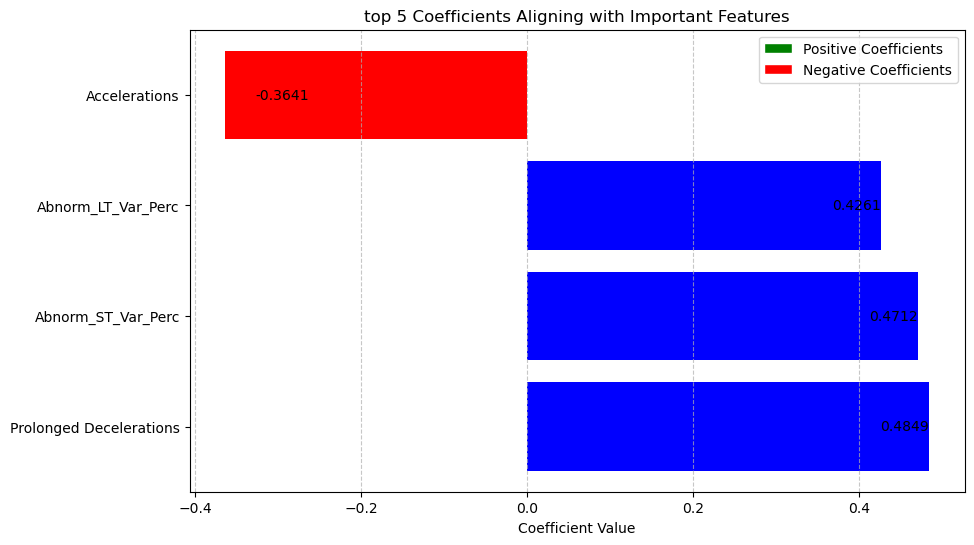

In [12]:


# Feature names and corresponding coefficients
features = ["Prolonged Decelerations", "Abnorm_ST_Var_Perc", "Abnorm_LT_Var_Perc", "Accelerations"]
coefficients = [ 0.48485918632134756, 0.4711907528466762, 0.42614641992406366, -0.36406579288786295]

# Define colors based on coefficient sign
colors = ["blue"if coef >= 0 else "red" for coef in coefficients]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(features, coefficients, color=colors)
plt.xlabel("Coefficient Value")
plt.title("top 5 Coefficients Aligning with Important Features")

# Add legend for positive and negative coefficients
plt.legend(handles=[plt.Rectangle((0,0),1,1,color='green',ec='w'), plt.Rectangle((0,0),1,1,color='red',ec='w')],
           labels=['Positive Coefficients', 'Negative Coefficients'], loc='upper right')

# Add coefficient values on bars
for bar, coef in zip(bars, coefficients):
    plt.text(bar.get_width() if coef >= 0 else bar.get_width() * 0.9, bar.get_y() + bar.get_height()/2, f'{coef:.4f}', 
             va='center', ha='right' if coef >= 0 else 'left', color='black')

plt.grid(True,axis="x", linestyle="--", alpha=0.7)
plt.savefig("../Images/corr")
plt.show()


<Axes: >

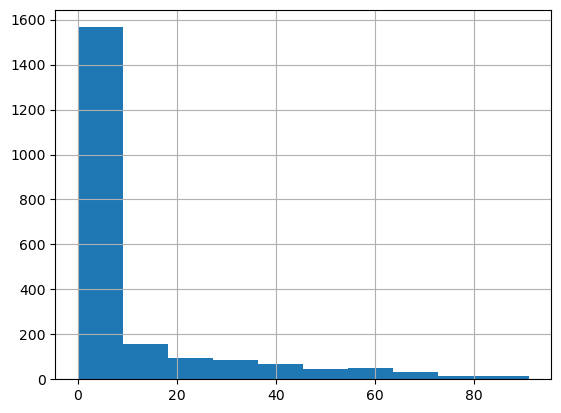

In [13]:
fetal_df.abnorm_LT_Var_Perc.hist()

<Axes: >

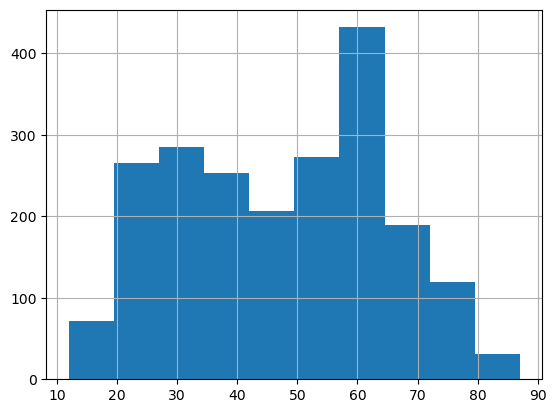

In [14]:
fetal_df.abnorm_ST_Var_Perc.hist()

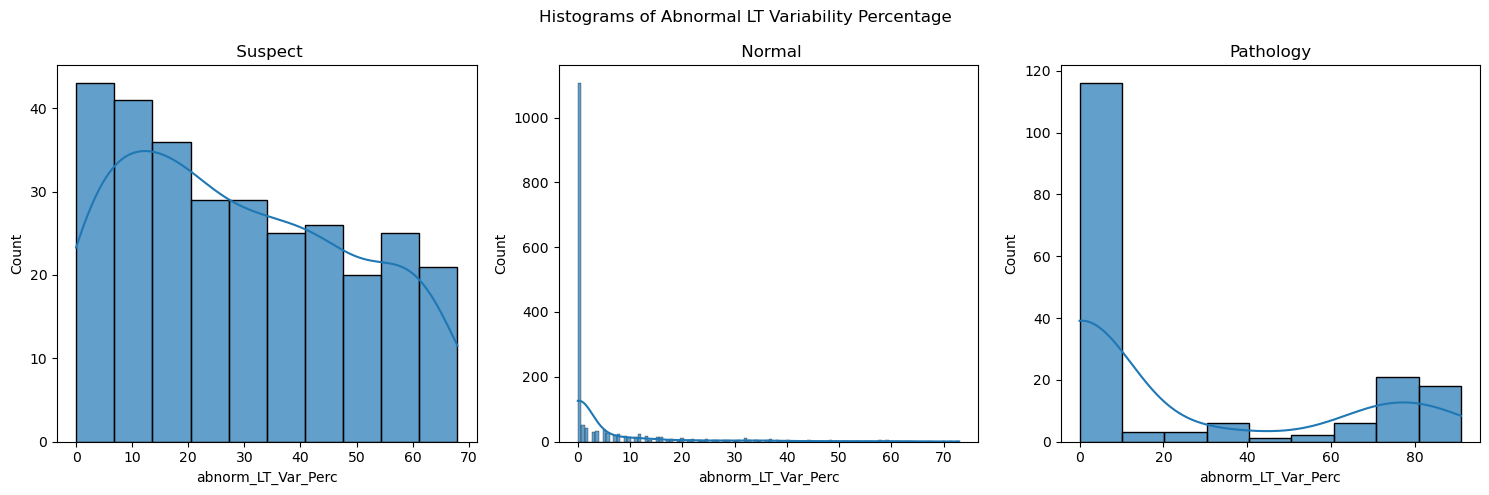

In [15]:


# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over each fetal health class and create a histogram
for i, health_class in enumerate(fetal_df["fetal_health"].unique()):
    sns.histplot(data=fetal_df[fetal_df["fetal_health"] == health_class], 
                 x="abnorm_LT_Var_Perc", 
                 kde=True, 
                 ax=axes[i], 
                 alpha=0.7)
    
    # Set title for each subplot
    if health_class == 1:
        axes[i].set_title(" Normal")
    elif health_class == 2:
        axes[i].set_title(" Suspect")
    else:
        axes[i].set_title("Pathology")
    
   # plt.xlabel("Abnormal LT Variability Percentage")
   # plt.ylabel("Frequency")

# Set common labels and title
fig.suptitle("Histograms of Abnormal LT Variability Percentage")


# Adjust layout
plt.tight_layout()
plt.savefig("../Images/hist_ab_LT")

# Show the plot
plt.show()



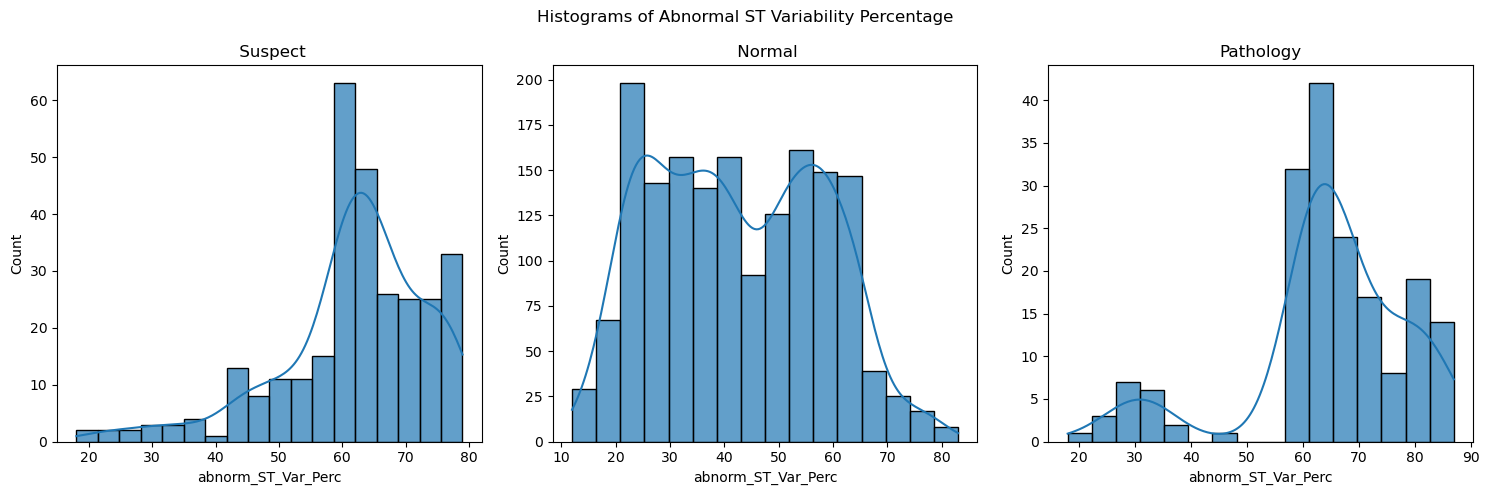

In [16]:

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over each fetal health class and create a histogram
for i, health_class in enumerate(fetal_df['fetal_health'].unique()):
    sns.histplot(data=fetal_df[fetal_df['fetal_health'] == health_class], 
                 x='abnorm_ST_Var_Perc', 
                 kde=True, 
                 ax=axes[i], 
                 alpha=0.7)
    
    # Set title for each subplot
    if health_class == 1:
        axes[i].set_title(" Normal")
    elif health_class == 2:
        axes[i].set_title(" Suspect")
    else:
        axes[i].set_title("Pathology")

# Set common labels and title
fig.suptitle("Histograms of Abnormal ST Variability Percentage")
#plt.xlabel("Abnormal ST Variability Percentage")
#plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.savefig("../Images/hist_ab_ST")

# Show the plot
plt.show()


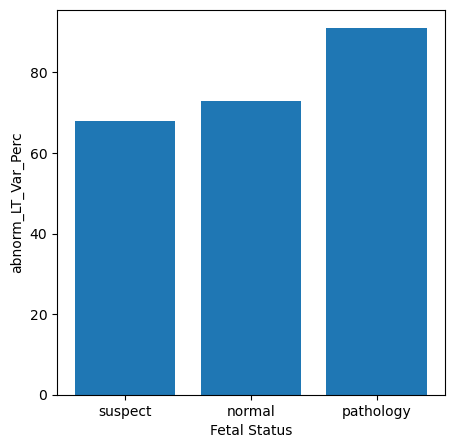

In [17]:



# Define the mapping dictionary
health_mapping = {1: "normal", 2: "suspect", 3: "pathology"}

# Map the numerical values to labels in the "fetal_health" column
fetal_df["fetal_health_label"] = fetal_df["fetal_health"].map(health_mapping)

# Set the figure size
plt.figure(figsize=(5,5))

# Create a bar chart
plt.bar(fetal_df["fetal_health_label"], fetal_df["abnorm_LT_Var_Perc"])

# Set the labels and title
plt.xlabel("Fetal Status")
plt.ylabel("abnorm_LT_Var_Perc")

plt.savefig("../Images/LT")

# Show the plot
plt.show()



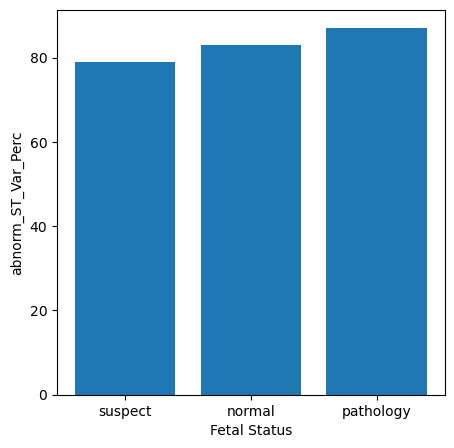

In [18]:


# Define the mapping dictionary
health_mapping = {1: "normal", 2: "suspect", 3: "pathology"}

# Map the numerical values to labels in the "fetal_health" column
fetal_df["fetal_health_label"] = fetal_df["fetal_health"].map(health_mapping)

# Set the figure size
plt.figure(figsize=(5, 5))

# Create a bar chart
plt.bar(fetal_df["fetal_health_label"], fetal_df["abnorm_ST_Var_Perc"])

# Set the labels and title
plt.xlabel("Fetal Status")
plt.ylabel("abnorm_ST_Var_Perc")
plt.savefig("../Images/ST")
# Show the plot
plt.show()
